<img src="http://www.ubu.es/sites/default/files/portal_page/images/logo_color_2l_dcha.jpg" height="150" width="150" align="right"/>

## Collaborative Filtering (1)
[Nacho Santos](www.nacho.santos.name)

## Introduction
The purpose of this assignment is to implement a **collaborative filtering algorithm** in python. This assignment is based on the course “Machine learning” by Andrew N https://www.coursera.org/course/ml. Before starting the work, you should read carefully the cooperative filtering algorithm explained in [class](https://docs.google.com/presentation/d/1OF1gE-ycuI01ds_lXwle6JnrCZMBHKSFgFSBh0LOYlU/edit?usp=sharing). Besides, you can watch the [videos](https://drive.google.com/file/d/0B-Y_cBY4Vgw9dVNrT3VfYU80RWs/view?usp=sharing) from the course Machine Learning where Andrew Ng introduces and explains the collaborative filtering.

On the other hand, it is necessary to use the Numpy library. You can learn the fundaments of Numpy following the next tutorials: [Introduction to Numpy](https://anaconda.org/jismartin/intro_numpy/notebook) and [Introduction to Matplotlib](https://anaconda.org/jismartin/intro_matplotlib/notebook)

The work is divided into progressive parts. Some functions have already been implemented to help you to test the code. These functions are in the python file **"recommender_systema.py"** provided with this interactive notebook. 

**Your task is to complete the python code when you are asked to do it**.

## Import python packages

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
# This line is necessary to show matplotlib plots inside the jupyter notebook
%matplotlib inline

## 1. Download movies database and prepare data
**Download** movielens 100k dataset **"ml-100k.zip"** from http://grouplens.org/datasets/movielens/100k/
The file "README.TXT" describes tha dataset composed by different files. In particular, you only need the files:
* "u.data" that contains the ratings on scale 1 to 5. Users and items are numbered consecutively from 1. The data is randomly ordered in rows with the next format: *user_id | item_id | rating | timestamp*
* "u.item" that contains the information about the movies

**Copy these two files** into the working folder of the jupyter notebook

### 1.1 Import data

Fisrt, we import the names of the movies. We use the Pandas library (http://pandas.pydata.org/) to read the "u.item", remove all unnecessary values and keep only the names.

In [26]:
# import pandas
from pandas import read_table
# read csv file
items = read_table('u.item',header=None,sep='|',encoding='ISO-8859-1')
# remove collumns 2-24
items.drop(range(2,24),axis=1, inplace=True)
# name the columns
items.columns = ['itemid','title']
# show the first 5 rows of the dataframe
items.head()

,itemid,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


The dataframe "items" contains the column "itemid" with the Movielens index of each movie, and the column "title"  with the title of each movie. If you want to get the name of the i-th movie, you can use the method *iloc*

In [27]:
# show the name of the 25-th movie (remember, in python the index always starts from 0)
items.iloc[24]['title']

'Birdcage, The (1996)'

### Task 1
***
Now, **you have to import** the ratings from the file 'u.data'. 
#### Tips
* You can read a text file into a Numpy array using the function [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) (use the *delimiter='\t'* to split columns)

In [28]:
# Task: import ratings
# YOUR CODE ..................................

# import pandas
data = np.genfromtxt('u.data',dtype = int, delimiter = '\t')
data_panda = pd.DataFrame(data, columns = ['user_id','item_id','rating','timestamp'])
data_panda.head()




,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### 1.2 Build arrays Y, R

### Task 2
***
Now, **you have to build** the matrices Y and R. 

The *n_movies x n_users (mxu)* matrix Y represents (by columns) the ratings that each user gave to the movies she watched

$Y=\begin{bmatrix}y^{(1,1)} & ...& y^{(1,u)} \\. & ...& .\\y^{(m,1)} & ...& y^{(m,u)} \end{bmatrix}$

The matrix R is complementary to Y. R has the same dimension of Y, i.e. *n_movies x n_users (mxu)*, and represents (by columns) if a user watched a movie (1) or did not (0).

$R=\begin{bmatrix}r^{(1,1)} & ...& r^{(1,u)} \\. & ...& .\\r^{(m,1)} & ...& r^{(m,u)} \end{bmatrix}$

where

$r^{(i,j)}=\begin{cases}1 & user(j) \ watched \ movie(i)\\0 & otherwise\end{cases}$

#### Tips
* Remember that in Numpy the index array always starts with 0, i.e. the row 0 of the matrix Y represents the ratings of the movie 1 of Movielens database, similarly, the column 0 of the matrix Y represents the ratings of the user 1 of the Movielens database.
* The Numpy function **unique()** returns the sorted unique elements of an array; it may be useful to get the list of users and movies from the rating database
* The Numpy function **zeros()** returns a matrix of zeros 
* Supposing a Numpy array A, the function **A.shape[0]** returns the number of rows, and **A.shape[1]** the number of columns

In [29]:
# Task: bulid matrices Y and R
# YOUR CODE ..................................


n_movies = items.shape[0]
n_users = np.unique(data_panda['user_id']).shape[0]

y = np.zeros((n_movies,n_users))
r = np.zeros((n_movies,n_users))

for i in range(n_movies):
    usuarios = data_panda[data_panda.item_id == i+1]['user_id']
    for j in usuarios:
        r[i][j-1] = 1

for i in data[:,0:3]:
    y[i[1]-1][i[0]-1] = i[2]
    

### 1.3 Using matrices Y and R

### Task 3
***
**Answer** the next questions:
1. How many movies did the Movielens user 12 watch?
2. What is the minimum rating of the Movielens user 12 ? And the maximum?
3. What is the maximum rating of the Movielens user 12 ?
4. What are the movie indices that the Movielens user 12 watched? And the user 11?
5. What are the movie indices that both the Movielens user 12 and 11 watched?

#### Tips
* The Numpy function **where(A>0)** returns the indices of the elements of A where the condition >0 is true


In [30]:
# Task: explore Y and R
# YOUR CODE ..................................
cont = 0
usuario12 = r[:,11]
cont = np.count_nonzero(usuario12 == 1)
print('Vistas: ' +str(cont))

y1 = y[:,11]
usuario12 = np.delete(y1, np.where(r[:,11] == 0))
minimo = np.min(usuario12)
maximo = np.max(usuario12)
print('Minimo: ' +str(minimo))
print('Maximo: ' +str(maximo))

indices12 = np.where(r[:,11]>0)
indices12 = np.array(indices12)
print('Indices para el 12: ' +str(indices12+1))
indices11 = np.where(r[:,10]>0)
indices11 = np.array(indices11)
print('Indices para el 11: ' +str(indices11+1))

indicescomun = np.intersect1d(indices12,indices11)
indicescomun = np.array(indicescomun)
print('Indices comunes: ' +str(indicescomun+1))

Vistas: 51
Minimo: 1.0
Maximo: 5.0
Indices para el 12: [[  4  15  28  50  69  71  82  88  96  97  98 127 132 133 143 157 159 161
  168 170 172 174 191 195 196 200 202 203 204 215 216 228 238 242 276 282
  300 318 328 381 392 402 416 471 480 591 684 708 735 753 754]]
Indices para el 11: [[  8   9  11  12  15  22  24  25  28  29  38  39  40  42  47  51  52  54
   56  57  58  69  70  79  83  86  88  90  94  97  98 100 107 109 110 111
  120 121 123 125 135 168 173 175 176 180 185 190 191 194 196 203 204 208
  211 213 215 216 222 227 228 229 230 237 238 239 241 258 259 260 268 274
  277 286 290 291 300 301 312 317 318 324 332 350 356 357 365 367 370 372
  382 383 386 393 395 399 401 402 405 414 423 425 427 428 429 430 431 433
  434 435 449 451 455 504 508 517 521 524 526 527 544 549 558 561 573 577
  580 597 603 646 652 654 659 660 662 663 690 692 699 707 710 713 714 715
  716 717 718 719 720 721 722 723 724 725 726 727 728 729 730 731 732 733
  734 735 736 737 738 739 740 741 742 743 744 7

### 1.4 Checking Y and R

### Task 4
***
Check the matrices Y and R computed above by calculating some statistics (your values must be equal to the values shown below)

* number of users: 943
* number of movies: 1682
* dimension of Y: (1682,943)
* dimension of R: (1682,943)
* number of ratings: 100000
* number of nonzero elements of R: 100000
* average rating: 3.5299
* maximum rating: 5.0000
* minimum rating: 1.0000
* average rating of the movie 1: 3.8783
* average rating of the movie 10: 3.8315
* average rating of the movie 100: 4.1555
* average rating of the movie 1000: 3.0000 
* average rating of the user 1: 3.6103
* average rating of the user 10: 4.2065
* average rating of the user 100: 3.0678
* average rating of the user 900: 2.5556

#### Tips
* Suppose the user i. Note that the average of ratings is over the movies that user i watched, so you have to consider only the values Y(j,i) such as the corresponding R(j,i) is equal to one.

In [31]:
# Task: check Y and R
# YOUR CODE ..................................

print(n_users)
print(n_movies)
print(y.shape)
print(r.shape)
print(len(data[:,2]))
print(np.sum(r))
print(np.sum(y[r>0])/np.sum(r))
print(np.max(y[r>0]))
print(np.min(y[r>0]))
print(sum(y[0,:])/sum(r[0,:]))
print(sum(y[9,:])/sum(r[9,:]))
print(sum(y[99,:])/sum(r[99,:]))
print(sum(y[999,:])/sum(r[999,:]))
print(sum(y[:,0])/sum(r[:,0]))
print(sum(y[:,9])/sum(r[:,9]))
print(sum(y[:,99])/sum(r[:,99]))
print(sum(y[:,899])/sum(r[:,899]))

943
1682
(1682, 943)
(1682, 943)
100000
100000.0
3.52986
5.0
1.0
3.87831858407
3.83146067416
4.15551181102
3.0
3.61029411765
4.20652173913
3.06779661017
2.55555555556


### 1.5 Sparse matrix Y

### Task 5
***
You can use the Numpy function **matshow()** to show that the matrix Y is sparse (most values are zero because they correspond to movies that have not been watched). You should get a plot similar to the next one:
<img src="https://goo.gl/dk84YT" height="400" width="300" align="centre"/>

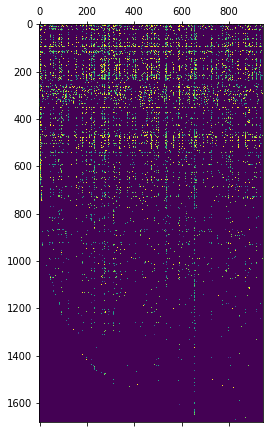

In [32]:
# Task: show matrix Y
# YOUR CODE ..................................
y = np.array(y)
plt.matshow(y)







### 1.6 Save variables

### Task 6
***
Finally, save the matrices Y and R so you can load them in another notebook.

In [34]:
# Task: save a matrix Y and R
# YOUR CODE ..................................
np.save('matrizy.npy',y)
np.save('matrizr.npy',r)




